### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### reading the CSV files

In [2]:
train_df = pd.read_csv('train.csv',index_col='PassengerId')
test_df = pd.read_csv('test.csv',index_col='PassengerId')

## Analyizng the data

In [3]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    f

In [4]:
combine_df = pd.concat([train_df,test_df])

In [5]:
combine_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
combine_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Visualizing null values

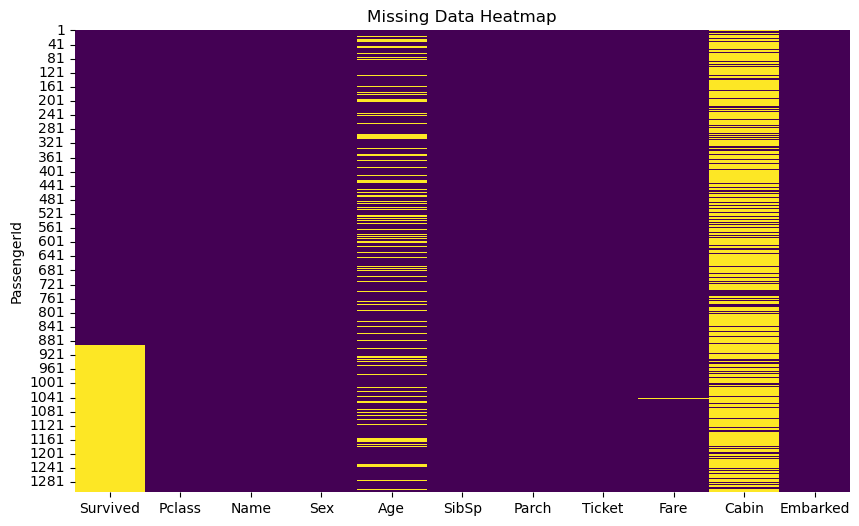

In [7]:

plt.figure(figsize=(10, 6))
sns.heatmap(combine_df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Distribution of target variable (Survived)

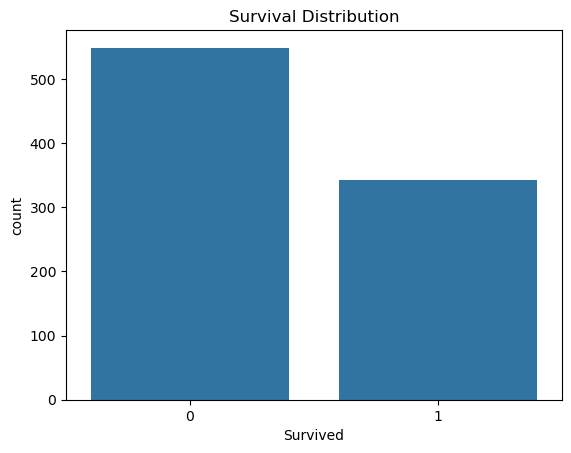

In [8]:
sns.countplot(x='Survived', data=train_df)
plt.title('Survival Distribution')
plt.show()

### Visualizing age distribution

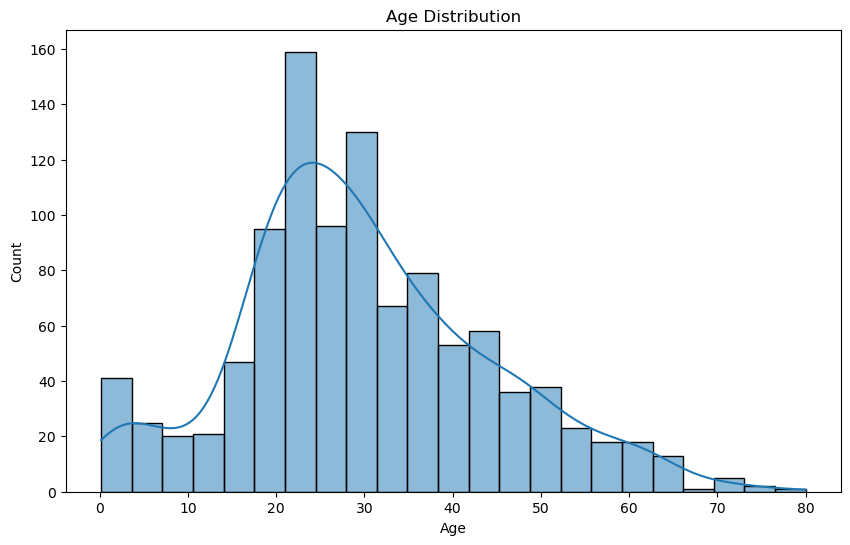

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(combine_df['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

### Distribution of Age by Survival

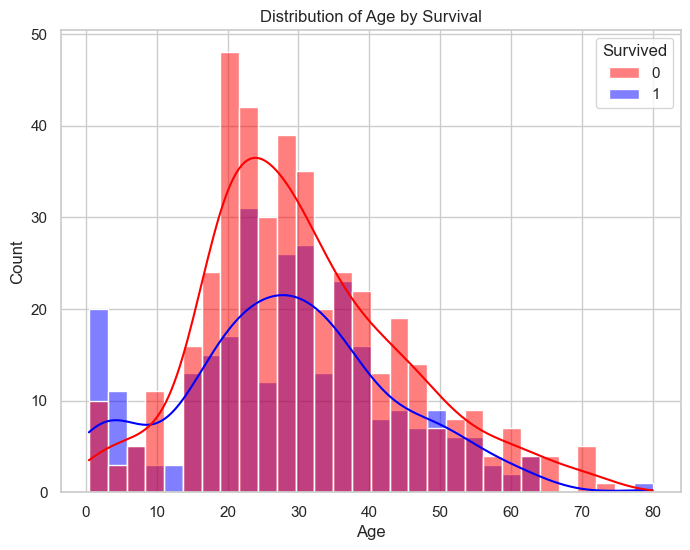

In [10]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30, palette={0: "red", 1: "blue"})
plt.title('Distribution of Age by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Survival Rate by Class


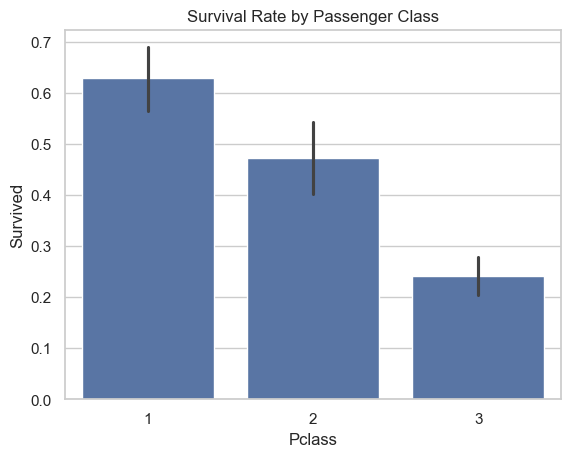

In [11]:
sns.barplot(x='Pclass', y='Survived', data=combine_df)
plt.title('Survival Rate by Passenger Class')
plt.show()

### Survival Rate by Sex

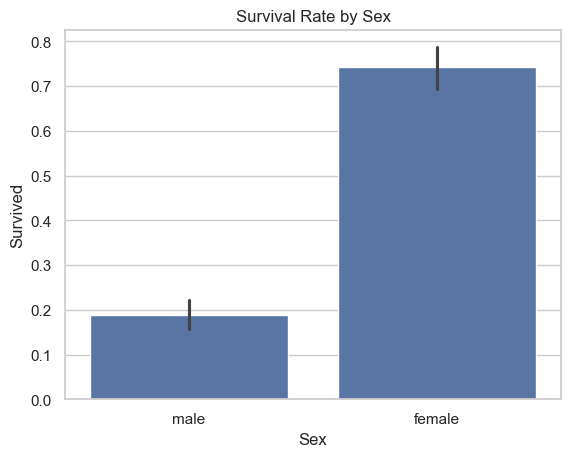

In [12]:
sns.barplot(x='Sex', y='Survived', data=combine_df)
plt.title('Survival Rate by Sex')
plt.show()

### Survival Rate by Embarked

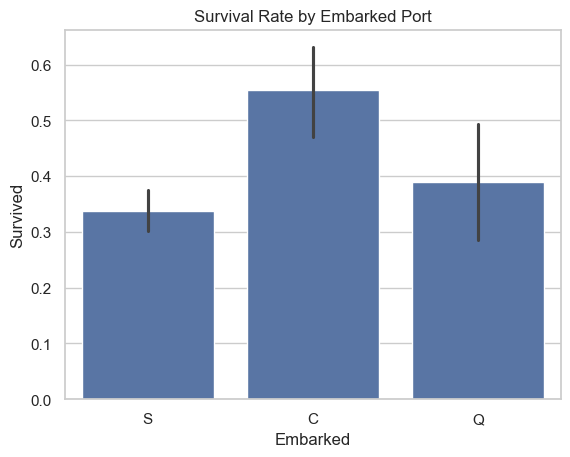

In [13]:
sns.barplot(x='Embarked', y='Survived', data=combine_df)
plt.title('Survival Rate by Embarked Port')
plt.show()

Fill missing age values with the median age of passengers grouped by Pclass and Sex

In [14]:
train_df['Age'] = train_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
test_df['Age'] = test_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

In [15]:
train_df.fillna({'Cabin':'U'},inplace=True)
test_df.fillna({'Cabin':'U'},inplace=True)

Fill missing 'Embarked' values with the most frequent value (mode)

In [16]:
train_df.fillna({'Embarked': train_df['Embarked'].mode()[0]}, inplace=True)

fill the missing 'Fare' values in the test dataset with the median fare of passengers grouped by Pclass and Embarked

In [17]:
test_df['Fare'] = test_df.groupby(['Pclass', 'Embarked'])['Fare'].transform(lambda x: x.fillna(x.median()))

In [18]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    f

Convert 'Sex' column to numeric

In [19]:
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

In [20]:
def cabin_to_num(input : str):
    def name_to_num(name : str):
        if len(name) == 1:
            return (ord(name[0])- ord('A'))* 1000
        else:
            return (ord(name[0])- ord('A'))* 1000 + int(name[1:])

    cabins = input.split(' ')
    sum = 0
    for cabin in cabins:
        if cabin == 'U':
            return -1
        else:
            sum += name_to_num(cabin)
    return sum/len(cabins)

In [21]:
train_df['Cabin'] = train_df['Cabin'].apply(cabin_to_num)
test_df['Cabin'] = test_df['Cabin'].apply(cabin_to_num)

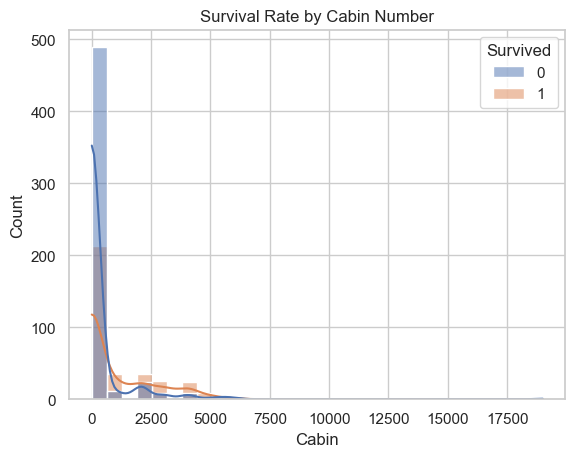

In [22]:
sns.histplot(data=train_df, x='Cabin', hue='Survived', bins=30, kde=True)
plt.title('Survival Rate by Cabin Number')
plt.show()

One-hot encoding for 'Embarked'

In [23]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')

Since Tickets values have weird patterns, we will drop this column

In [24]:
train_df.drop('Ticket', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

In [25]:
# Example of title mapping function
def extract_title(name):
    if pd.isna(name):
        return "Unknown"
    title = name.split(",")[1].split(".")[0].strip()
    return title

# Map uncommon titles to common categories
def map_title(title):
    title_mapping = {
        "Mr": 1,
        "Mrs": 2,
        "Miss": 3,
        "Master": 4,
        "Nobility": 5,
        "Military": 6,
        "Professional": 7,
        "Other": 8
    }
    if title in ["Don", "Sir", "Jonkheer", "Countess"]:
        return title_mapping["Nobility"]
    elif title in ["Capt", "Col", "Major"]:
        return title_mapping["Military"]
    elif title in ["Dr", "Rev"]:
        return title_mapping["Professional"]
    elif title in ["Mme", "Mlle", "Ms"]:
        return title_mapping["Miss"]
    return title_mapping.get(title, title_mapping["Other"])

Extract and classify titles in train and test sets

In [26]:
train_df['Title'] = train_df['Name'].apply(extract_title).apply(map_title)
test_df['Title'] = test_df['Name'].apply(extract_title).apply(map_title)

### Survival Rate by Title

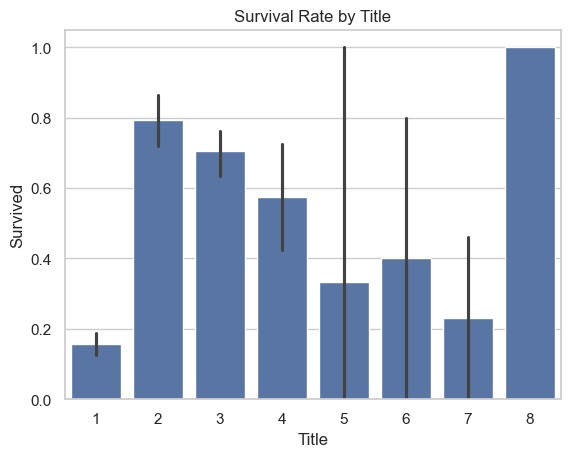

In [27]:
sns.barplot(x='Title', y='Survived', data=train_df)
plt.title('Survival Rate by Title')
plt.show()

In [28]:
# Drop the name
train_df.drop('Name', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
# One-hot encoding for 'Title'
train_df = pd.get_dummies(train_df, columns=['Title'], prefix='Title').astype(float)
test_df = pd.get_dummies(test_df, columns=['Title'], prefix='Title').astype(float)
# Align the columns
train_df, test_df = train_df.align(test_df, join='outer', axis=1, fill_value=0)
test_df.drop('Survived',axis=1,inplace=True)

In [29]:
# Display the first few rows of the modified train_ds and test_ds
test_df.head()
train_df.head()

,Age,Cabin,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex,SibSp,Survived,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Title_7,Title_8
PassengerId,,,,,,,,,,,,,,,,,,,
1,22.0,-1.0,0.0,0.0,1.0,7.2500,0.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38.0,2085.0,1.0,0.0,0.0,71.2833,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,-1.0,0.0,0.0,1.0,7.9250,0.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,35.0,2123.0,0.0,0.0,1.0,53.1000,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,35.0,-1.0,0.0,0.0,1.0,8.0500,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Correlation heatmap

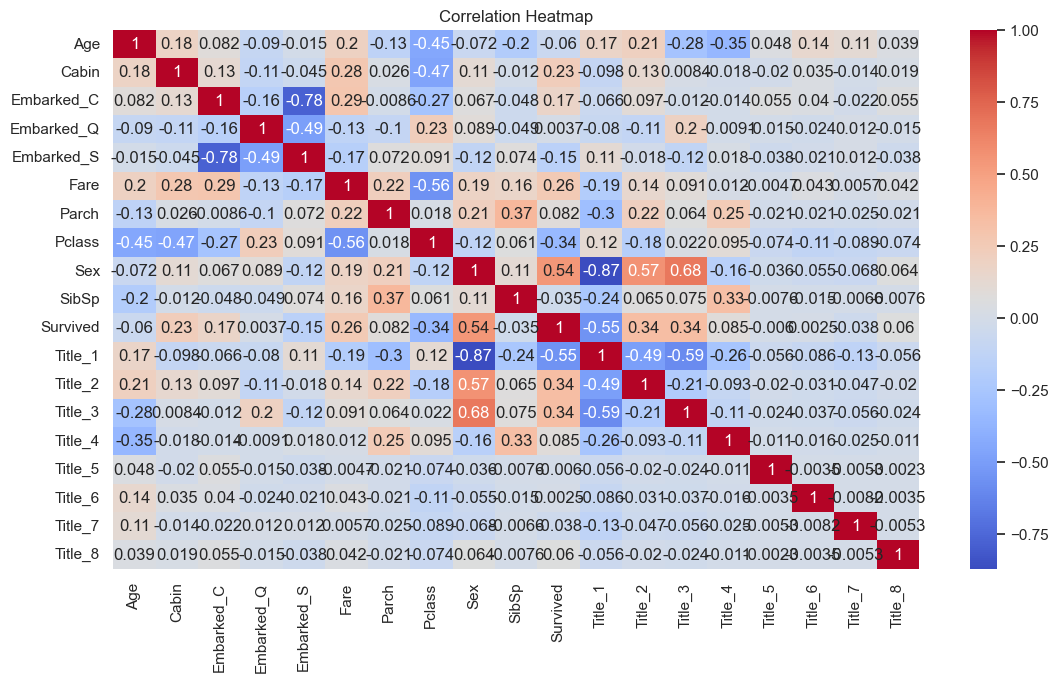

In [30]:
combine_df = pd.concat([train_df,test_df])
plt.figure(figsize=(13, 7))
sns.heatmap(combine_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Normalization

In [31]:
# Identify all numeric columns (excluding 'Survived')
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.difference(['Survived'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the train dataset
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])

# Transform the test dataset
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [32]:
# Display a random sample of 5 rows from the normalized test_ds
train_df.sample(5)

,Age,Cabin,Embarked_C,Embarked_Q,Embarked_S,Fare,Parch,Pclass,Sex,SibSp,Survived,Title_1,Title_2,Title_3,Title_4,Title_5,Title_6,Title_7,Title_8
PassengerId,,,,,,,,,,,,,,,,,,,
681,0.264891,0.000000,0.0,1.0,0.0,0.015883,0.000000,1.0,1.0,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
867,0.334004,0.000000,1.0,0.0,0.0,0.027050,0.000000,0.5,1.0,0.125,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
184,0.007288,0.263407,0.0,0.0,1.0,0.076123,0.166667,0.5,0.0,0.250,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
339,0.560191,0.000000,0.0,0.0,1.0,0.015713,0.000000,1.0,0.0,0.000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.019854,0.000000,0.0,0.0,1.0,0.041136,0.166667,1.0,0.0,0.375,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Convert the data into numpy format

In [33]:
x_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
tx = x_train.to_numpy()
ty = y_train.to_numpy()
ty = ty.reshape(-1, 1)
tx.shape

(891, 18)

### Adding functions

In [34]:
def Relu(x):
    return x if x > 0 else 0.0  # Ensure 0.0 to maintain float type

def d_Relu(x):
    return 1. if x>0 else 0.0

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def d_sigmoid(x):
    return x * (1 - x)

def d_tanh(x):
    return 1 - np.tanh(x)**2

In [35]:
np.random.seed(42)

## Iinitilzing the Neural Network

In [36]:
w_1 = np.random.uniform(-1, 1, (18, 5))
b_1 = np.random.uniform(-1, 1, (5))
af1 = np.vectorize(Relu)
df1 = np.vectorize(d_Relu)
w_1

array([[-0.25091976,  0.90142861,  0.46398788,  0.19731697, -0.68796272],
       [-0.68801096, -0.88383278,  0.73235229,  0.20223002,  0.41614516],
       [-0.95883101,  0.9398197 ,  0.66488528, -0.57532178, -0.63635007],
       [-0.63319098, -0.39151551,  0.04951286, -0.13610996, -0.41754172],
       [ 0.22370579, -0.72101228, -0.4157107 , -0.26727631, -0.08786003],
       [ 0.57035192, -0.60065244,  0.02846888,  0.18482914, -0.90709917],
       [ 0.2150897 , -0.65895175, -0.86989681,  0.89777107,  0.93126407],
       [ 0.6167947 , -0.39077246, -0.80465577,  0.36846605, -0.11969501],
       [-0.75592353, -0.00964618, -0.93122296,  0.8186408 , -0.48244004],
       [ 0.32504457, -0.37657785,  0.04013604,  0.09342056, -0.63029109],
       [ 0.93916926,  0.55026565,  0.87899788,  0.7896547 ,  0.19579996],
       [ 0.84374847, -0.823015  , -0.60803428, -0.90954542, -0.34933934],
       [-0.22264542, -0.45730194,  0.65747502, -0.28649335, -0.43813098],
       [ 0.08539217, -0.71815155,  0.6

In [37]:
w_2 = np.random.uniform(1,-1,(5,3))
b_2 = np.random.uniform(1,-1,(3))
af2 = np.tanh
df2 = d_tanh

In [38]:
w_3 = np.random.uniform(1,-1,(3,1))
b_3 = np.random.uniform(1,-1,(1))
af3 = sigmoid

### Forward propagation

In [39]:
def forward_prop(x):
    z1 = x @ w_1
    z1 = z1 + b_1
    a1 = af1(z1)
    # print('a1 : \n' , a1)
    z2 = a1 @ w_2 + b_2
    # print( 'z2: \n', z2)
    a2 = af2(z2)
    # print('a2 :\n',a2)
    z3 = a2 @ w_3 + b_3
    # print('z3: \n', z3)
    a3 = af3(z3)
    # print('a3:\n ',a3)
    return a3,a2,a1


### Back propagation

In [ ]:
def back_prop(x, y,alpha):
    global w_1, w_2, w_3, b_1, b_2, b_3
    a3,a2,a1 = forward_prop(x)
    # print('a3: \n', a3)
    d3 = a3 - y
    dw3 = (1/a2.shape[0]) * a2.T @ d3
    # print('d3: \n', d3 ,'dw3: \n',dw3)
    d2 = d3 @ w_3.T * df2(a2)
    dw2 = (1/a1.shape[0]) * a1.T @ d2
    # print('d2: \n', d2)
    d1 = d2 @ w_2.T * df1(a1)
    dw1 = (1/x.shape[0]) * x.T @ d1
    # print('d1: \n', d1)
    # Update the weights
    w_3 = w_3 - (alpha*dw3)
    b_3 = b_3 - (alpha * np.sum(d3, axis=0))
    w_2 = w_2 - (alpha * dw2)
    b_2 = b_2 - (alpha*np.sum(d2,axis=0))
    w_1 = w_1 - (alpha * dw1)
    b_1 = b_1 - (alpha*np.sum(d1, axis=0))

### Using log-loss in cost function

In [41]:
def cost(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

## Training

In [42]:
losses = []
def train(x, y, epochs, alpha, decay_rate=0.0001):
    
    for i in range(epochs):
        # Adaptive learning rate using exponential decay
        adaptive_alpha = alpha / (1 + decay_rate * i)

        y_hat, _, _ = forward_prop(x)
        loss = cost(y, y_hat)
        losses.append(loss)
        back_prop(x, y, adaptive_alpha)

        print(f'Epoch {i+1}/{epochs} | Loss: {loss:.4f} | Alpha: {adaptive_alpha:.6f}')
    




In [43]:
def predict(x):
    y_hat,_,_ = forward_prop(x)
    return (y_hat> 0.5).astype(np.int64)

In [44]:
epochs = 25000
train(tx, ty, epochs, 0.003,0.000039)

Epoch 1/25000 | Loss: 0.6950 | Alpha: 0.003000
Epoch 2/25000 | Loss: 0.6780 | Alpha: 0.003000
Epoch 3/25000 | Loss: 0.6629 | Alpha: 0.003000
Epoch 4/25000 | Loss: 0.6519 | Alpha: 0.003000
Epoch 5/25000 | Loss: 0.6441 | Alpha: 0.003000
Epoch 6/25000 | Loss: 0.6381 | Alpha: 0.002999
Epoch 7/25000 | Loss: 0.6330 | Alpha: 0.002999
Epoch 8/25000 | Loss: 0.6293 | Alpha: 0.002999
Epoch 9/25000 | Loss: 0.6258 | Alpha: 0.002999
Epoch 10/25000 | Loss: 0.6222 | Alpha: 0.002999
Epoch 11/25000 | Loss: 0.6186 | Alpha: 0.002999
Epoch 12/25000 | Loss: 0.6149 | Alpha: 0.002999
Epoch 13/25000 | Loss: 0.6114 | Alpha: 0.002999
Epoch 14/25000 | Loss: 0.6079 | Alpha: 0.002998
Epoch 15/25000 | Loss: 0.6045 | Alpha: 0.002998
Epoch 16/25000 | Loss: 0.6013 | Alpha: 0.002998
Epoch 17/25000 | Loss: 0.5983 | Alpha: 0.002998
Epoch 18/25000 | Loss: 0.5956 | Alpha: 0.002998
Epoch 19/25000 | Loss: 0.5931 | Alpha: 0.002998
Epoch 20/25000 | Loss: 0.5907 | Alpha: 0.002998
Epoch 21/25000 | Loss: 0.5885 | Alpha: 0.002998
E

### Plot the loss over epochs

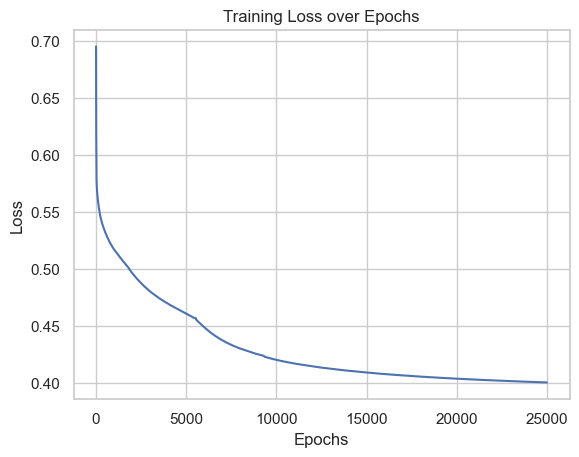

In [45]:
plt.plot(range(epochs), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

### Run predict on test

In [46]:
test = test_df.to_numpy()
predictions = predict(test)

### Save the predictions to a CSV file

In [47]:
submission_df = pd.DataFrame({'PassengerId': test_df.index, 'Survived': predictions.ravel()})
submission_df.to_csv("result.csv",index=False)

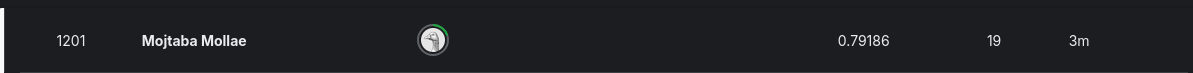